## This Project uses supervised machine learning algorithms (Logistic Regression, Decision Tree, Random Forest, XGBoost) to build a predictive model with the dataset FinanceFraudDetection 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

### Import the dataset

In [2]:
data = 'FinanceFraudDetectionModified.csv'
ori_df = pd.read_csv(data)

### Question 1. Is there any missing dada? If yes, how many are they per column?

In [3]:
ori_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048570 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048572 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048572 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


### Answer 1. There is no missing data because the Non-Null Count column shows that 

In [4]:
ori_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,NaN,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Drop the last column using iloc

In [5]:
df = ori_df.iloc[:, :-1]


In [6]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,NaN,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,NaN,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,NaN,36382.23,C195600860,41898.0,40348.79,0


In [7]:
print(f"The shape of the data we are working with is {df.shape}")

The shape of the data we are working with is (1048575, 10)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048570 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048572 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048572 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


# Checking missing values

In [9]:
df.isnull().values.any()

True

## True: There is missing data

In [10]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False


# True: missing value, False: Real values

### Print out any rows that have missing values

### df[condition to filter on]

In [11]:
#df.isnull() == True

In [12]:
#df[df.isnull()==True].head(20)

In [13]:
df.shape[0]

1048575

In [14]:
df.shape[1]

10

In [15]:
# Print out the rows that have missing values
for col in df.columns:
    temp_df = df[df[col].isna()]
    if temp_df.shape[0] != 0:
        display(temp_df)
        print(f"Processing {col}")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
3,1,CASH_OUT,NaN,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
8,1,PAYMENT,NaN,C1265012928,2671.0,0.00,M1176932104,0.0,0.0,0
13,1,PAYMENT,NaN,C1716932897,10127.0,0.00,M801569151,0.0,0.0,0
18,1,PAYMENT,NaN,C2033524545,15123.0,14451.36,M473053293,0.0,0.0,0
23,1,PAYMENT,NaN,C504336483,67852.0,63975.59,M1404932042,0.0,0.0,0


Processing amount


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
9,1,DEBIT,5337.77,C712410124,NaN,36382.23,C195600860,41898.0,40348.79,0
19,1,TRANSFER,215310.30,C1670993182,NaN,0.00,C1100439041,22425.0,0.00,0
29,1,PAYMENT,9920.52,C764826684,NaN,0.00,M1940055334,0.0,0.00,0


Processing oldbalanceOrg


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,NaN,10845.0,157982.12,0
20,1,PAYMENT,1373.43,C20804602,13854.0,12480.57,NaN,0.0,0.00,0
30,1,PAYMENT,3448.92,C2103763750,0.0,0.00,NaN,0.0,0.00,0


Processing nameDest


## Imputation

In [16]:
df.fillna(0)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,0.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [17]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [18]:
# for col in df.columns:
#     print(col)
#     temp_df = df[df[col].isna()] # 
#     #display(temp_df)
    
#     if temp_df.shape[0] != 0: # The rows that have missing values
#         #display(temp_df)
#         #print(f"Processing {col}")
#         temp_df[col] = temp_df[col].fillna(df[col].mean())
#         display(temp_df)

In [19]:
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())

In [20]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.640000,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.280000,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.000000,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,158667.712672,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.140000,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.350000,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.360000,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.050000,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.050000,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [21]:
col_names = df.columns
print('The names of columns are:', col_names)

The names of columns are: Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')


In [22]:
cols = df.columns.tolist()

print('There are {} categorical variables\n'.format(len(cols)))
print('All variables are :', cols)


There are 10 categorical variables

All variables are : ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']


In [23]:
categorical = [var for var in df.columns if df[var].dtype == 'O']     #'O' represents object Dtype

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['type', 'nameOrig', 'nameDest']


In [24]:
df[categorical].head()

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703


In [25]:
# Check missing values in categorical variables

df[categorical].isnull().sum()

type        0
nameOrig    0
nameDest    3
dtype: int64

There are no missing values in the given dataset from the above exercution  

View the contribution of each column and See what they mean

In [26]:
for var in categorical:
    print(df[var].value_counts()/np.single(len(df)))

CASH_OUT    0.356332
PAYMENT     0.337480
CASH_IN     0.216608
TRANSFER    0.082734
DEBIT       0.006845
Name: type, dtype: float64
C1214450722    1.907350e-06
C309111136     1.907350e-06
C1268675361    1.907350e-06
C720460198     1.907350e-06
C1109092856    1.907350e-06
                   ...     
C560131732     9.536752e-07
C455251560     9.536752e-07
C650578540     9.536752e-07
C1883668225    9.536752e-07
C1264356443    9.536752e-07
Name: nameOrig, Length: 1048317, dtype: float64
C985934102     9.346017e-05
C1286084959    9.155282e-05
C1590550415    8.487710e-05
C248609774     8.392342e-05
C665576141     8.296974e-05
                   ...     
M2036888797    9.536752e-07
M1545238325    9.536752e-07
M382871047     9.536752e-07
M322765556     9.536752e-07
M677577406     9.536752e-07
Name: nameDest, Length: 449633, dtype: float64


In [27]:
Numerical = [var for var in df.columns if df[var].dtype != 'O']  # 'O' represents object Dtype

print('There are {} numerical variables\n'.format(len(Numerical)))

print('The numerical variables are :', Numerical)

There are 7 numerical variables

The numerical variables are : ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']


In [28]:
# Check missing values in categorical variables

df[Numerical].isnull().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [29]:
for var in categorical:
    print(df[var].value_counts()/np.single(len(df)))

CASH_OUT    0.356332
PAYMENT     0.337480
CASH_IN     0.216608
TRANSFER    0.082734
DEBIT       0.006845
Name: type, dtype: float64
C1214450722    1.907350e-06
C309111136     1.907350e-06
C1268675361    1.907350e-06
C720460198     1.907350e-06
C1109092856    1.907350e-06
                   ...     
C560131732     9.536752e-07
C455251560     9.536752e-07
C650578540     9.536752e-07
C1883668225    9.536752e-07
C1264356443    9.536752e-07
Name: nameOrig, Length: 1048317, dtype: float64
C985934102     9.346017e-05
C1286084959    9.155282e-05
C1590550415    8.487710e-05
C248609774     8.392342e-05
C665576141     8.296974e-05
                   ...     
M2036888797    9.536752e-07
M1545238325    9.536752e-07
M382871047     9.536752e-07
M322765556     9.536752e-07
M677577406     9.536752e-07
Name: nameDest, Length: 449633, dtype: float64


---

### Plot the histograms to check distributions to find out if they are normal or skewed.If the variable follows normal distribution, then I will do Extreme Value Analysis. Otherwise if they are skewed, I will find IQR (Interquantile range).

In [30]:
import matplotlib as plt
import seaborn as sns

In [31]:
sns.set_theme()

<AxesSubplot: xlabel='amount', ylabel='Count'>

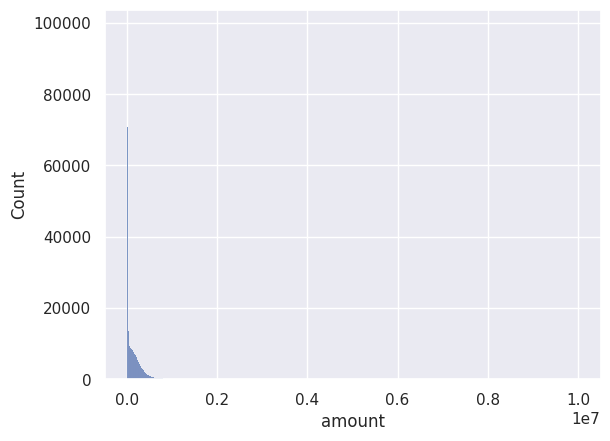

In [32]:
sns.histplot(df["amount"])

From the histograms, the distribution is left skew because there may have some data points on right but the count is very small, and they are not shown in the histograms.

In [33]:
# sns.displot(df["amount"])

In [34]:
print(round(df[Numerical].describe()),2)

            step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  1048575.0   1048575.0      1048575.0       1048575.0       1048575.0   
mean        27.0    158668.0       874012.0        893809.0        978160.0   
std         16.0    264941.0      2971750.0       3008271.0       2296780.0   
min          1.0         0.0            0.0             0.0             0.0   
25%         15.0     12149.0            0.0             0.0             0.0   
50%         20.0     76346.0        16002.0             0.0        126377.0   
75%         39.0    213762.0       136647.0        174600.0        915923.0   
max         95.0  10000000.0     38900000.0      38900000.0      42100000.0   

       newbalanceDest    isFraud  
count       1048575.0  1048575.0  
mean        1114198.0        0.0  
std         2416593.0        0.0  
min               0.0        0.0  
25%               0.0        0.0  
50%          218260.0        0.0  
75%         1149808.0        0.0  
max     

In [35]:
rslt_df_amount = df[df['amount'] > 2000000]
print('\nResult dataframe :\n', rslt_df_amount)


Result dataframe :
          step      type      amount     nameOrig  oldbalanceOrg  \
359         1  TRANSFER  2421578.09   C106297322           0.00   
375         1  TRANSFER  2545478.01  C1057507014           0.00   
376         1  TRANSFER  2061082.82  C2007599722           0.00   
1153        1  TRANSFER  3776389.09   C197491520           0.00   
1202        1  TRANSFER  2258388.15    C12139181           0.00   
...       ...       ...         ...          ...            ...   
1046593    95  TRANSFER  3605241.70   C971075452           0.00   
1047484    95  TRANSFER  3148886.01   C857538059       18166.13   
1047555    95  TRANSFER  2236090.83  C1291317126           0.00   
1048027    95  TRANSFER  3572499.78  C1076671504           0.00   
1048082    95  TRANSFER  2905341.96  C1244477950       41666.26   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
359                 0.0  C1590550415      8515645.77     19200000.00        0  
375           

### There are over 3000 data points with the "amount" fewer than 2 million that are not shown in the histogram.

<AxesSubplot: xlabel='oldbalanceOrg', ylabel='Count'>

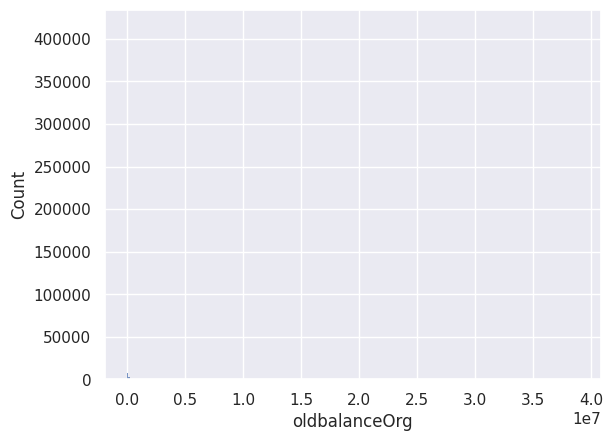

In [36]:
sns.histplot(df['oldbalanceOrg'])

### From the histogram, the distribution is extremely skew due to there are data points on the right with a small count and they are not displayed on the plot.

Selecting rows based on condition

In [37]:
rslt_df_old1 = df[df['oldbalanceOrg'] > 10000000]
print('\nResult dataframe :\n', rslt_df_old1)


Result dataframe :
          step     type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
1332        1  CASH_IN  143405.80  C2108708444     10100000.0      10200000.0   
2956        2  CASH_IN  168681.06   C728236551     10300000.0      10500000.0   
2957        2  CASH_IN  160370.33  C1887991591     10500000.0      10700000.0   
3666        2  CASH_IN   10443.68  C2122225197     10200000.0      10300000.0   
3667        2  CASH_IN   61344.23   C388143137     10300000.0      10300000.0   
...       ...      ...        ...          ...            ...             ...   
1044845    94  CASH_IN  218400.09  C1289764241     10700000.0      10900000.0   
1044846    94  CASH_IN   32430.55  C1258100769     10900000.0      10900000.0   
1044847    94  CASH_IN   92263.87  C1993376698     10900000.0      11000000.0   
1044848    94  CASH_IN  288621.09  C1076570932     11000000.0      11300000.0   
1044849    94  CASH_IN   56224.07   C225085973     11300000.0      11400000.0   

      

In [38]:
rslt_df_old2 = df[(df['oldbalanceOrg'] > 1000000) & (df['oldbalanceOrg'] <= 10000000)]
print('\nResult dataframe :\n', rslt_df_old2)


Result dataframe :
          step     type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
241         1  PAYMENT    4635.18  C1110698130     6313782.05      6309146.87   
242         1  PAYMENT    1267.97  C1053632127     6309146.87      6307878.90   
243         1  PAYMENT    6911.99    C89509666     6307878.90      6300966.92   
244         1  PAYMENT    1795.67  C1016856028     6300966.92      6299171.25   
245         1  PAYMENT    3199.06   C832292933     6299171.25      6295972.18   
...       ...      ...        ...          ...            ...             ...   
1048250    95  CASH_IN   48893.79  C1698409889     1772630.46      1821524.26   
1048251    95  CASH_IN  210899.89   C569878803     1821524.26      2032424.15   
1048252    95  CASH_IN  164119.42  C1912056627     2032424.15      2196543.58   
1048253    95  CASH_IN   64558.24  C2056251453     2196543.58      2261101.82   
1048254    95  CASH_IN  116591.73  C1113658472     2261101.82      2377693.55   

      

<AxesSubplot: xlabel='newbalanceOrig', ylabel='Count'>

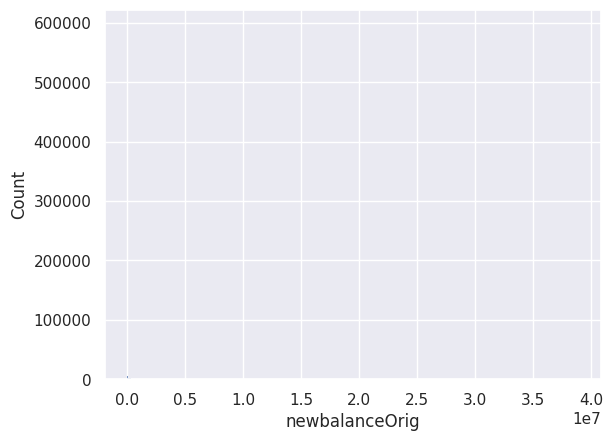

In [39]:
sns.histplot(df['newbalanceOrig'])

In [40]:
rslt_df_new1 = df[df['newbalanceOrig'] > 10000000]
print('\nResult dataframe :\n', rslt_df_new1)


Result dataframe :
          step     type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
1331        1  CASH_IN  183816.31   C205615258     9919025.73      10100000.0   
1332        1  CASH_IN  143405.80  C2108708444    10100000.00      10200000.0   
2955        2  CASH_IN  313452.48  C1842102517    10000000.00      10300000.0   
2956        2  CASH_IN  168681.06   C728236551    10300000.00      10500000.0   
2957        2  CASH_IN  160370.33  C1887991591    10500000.00      10700000.0   
...       ...      ...        ...          ...            ...             ...   
1044846    94  CASH_IN   32430.55  C1258100769    10900000.00      10900000.0   
1044847    94  CASH_IN   92263.87  C1993376698    10900000.00      11000000.0   
1044848    94  CASH_IN  288621.09  C1076570932    11000000.00      11300000.0   
1044849    94  CASH_IN   56224.07   C225085973    11300000.00      11400000.0   
1045429    94  CASH_IN  185599.69   C745726873     9919426.52      10100000.0   

      

### From the histogram, the distribution is extremely skew due to there are data points on the right with a small count and they are not displayed on the plot as seen below.

In [41]:
rslt_df_new2 = df[(df['newbalanceOrig'] > 1000000) & (df['newbalanceOrig'] <= 10000000)]
print('\nResult dataframe :\n', rslt_df_new2)


Result dataframe :
          step     type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
241         1  PAYMENT    4635.18  C1110698130     6313782.05      6309146.87   
242         1  PAYMENT    1267.97  C1053632127     6309146.87      6307878.90   
243         1  PAYMENT    6911.99    C89509666     6307878.90      6300966.92   
244         1  PAYMENT    1795.67  C1016856028     6300966.92      6299171.25   
245         1  PAYMENT    3199.06   C832292933     6299171.25      6295972.18   
...       ...      ...        ...          ...            ...             ...   
1048250    95  CASH_IN   48893.79  C1698409889     1772630.46      1821524.26   
1048251    95  CASH_IN  210899.89   C569878803     1821524.26      2032424.15   
1048252    95  CASH_IN  164119.42  C1912056627     2032424.15      2196543.58   
1048253    95  CASH_IN   64558.24  C2056251453     2196543.58      2261101.82   
1048254    95  CASH_IN  116591.73  C1113658472     2261101.82      2377693.55   

      

<AxesSubplot: xlabel='oldbalanceDest', ylabel='Count'>

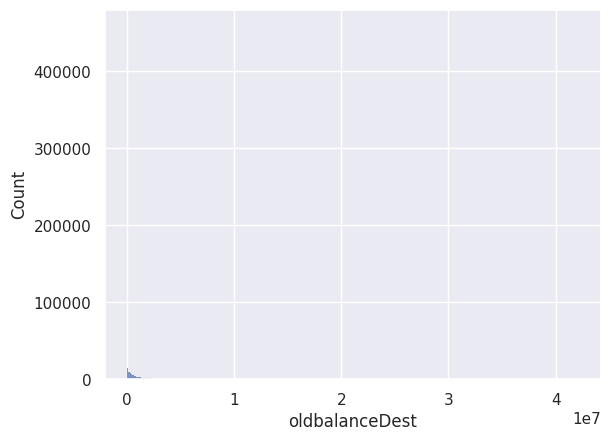

In [42]:
sns.histplot(df['oldbalanceDest'])

In [43]:
rslt_df_oldb1 = df[df['oldbalanceDest'] > 10000000]
print('\nResult dataframe :\n', rslt_df_oldb1)


Result dataframe :
          step      type      amount     nameOrig  oldbalanceOrg  \
362         1  TRANSFER  1457213.54   C396918327           0.00   
375         1  TRANSFER  2545478.01  C1057507014           0.00   
376         1  TRANSFER  2061082.82  C2007599722           0.00   
432         1   CASH_IN   349505.89   C173791568     7330235.59   
463         1   CASH_IN   222711.47  C2123533871     2419068.96   
...       ...       ...         ...          ...            ...   
1047904    95  CASH_OUT   257225.25  C1001899290           0.00   
1047974    95  TRANSFER   166846.64  C2140727709       72723.00   
1048011    95  TRANSFER  1339844.75  C1604159675           0.00   
1048311    95  CASH_OUT   127581.61  C1567904281       19465.38   
1048561    95     DEBIT     7880.88   C233708423       31489.00   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
362                0.00  C1590550415      10900000.0      19200000.0        0  
375           

In [44]:
rslt_df_oldb2 = df[(df['oldbalanceDest'] > 1000000) & (df['oldbalanceDest'] <= 10000000)]
print('\nResult dataframe :\n', rslt_df_oldb2)


Result dataframe :
          step      type      amount     nameOrig  oldbalanceOrg  \
88          1  TRANSFER   761507.39   C412788346           0.00   
89          1  TRANSFER  1429051.47  C1520267010           0.00   
94          1  TRANSFER  1724887.05  C1495608502           0.00   
96          1  TRANSFER   581294.26   C843299092           0.00   
113         1  CASH_OUT    85423.63   C460741164           0.00   
...       ...       ...         ...          ...            ...   
1048514    95  TRANSFER   136218.95   C969666269       43866.00   
1048519    95  CASH_OUT   271378.96  C1617333943        6268.62   
1048549    95     DEBIT     9983.95   C130161561         997.00   
1048553    95  CASH_OUT   103391.93  C2021893664      107623.00   
1048567    95  CASH_OUT   279674.05   C990252469       18002.85   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
88                 0.00  C1590550415      1280036.23     19200000.00        0  
89            

### From the histogram, the distribution is extremely skew due to there are data points on the right with a small count and they are not displayed on the plot as seen above.

<AxesSubplot: xlabel='newbalanceDest', ylabel='Count'>

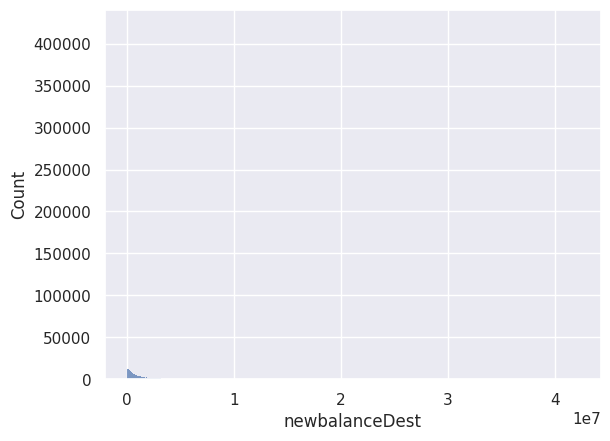

In [45]:
sns.histplot(df['newbalanceDest'])

### From the histogram, the distribution is extremely skew due to there are data points on the right with a small count and they are not displayed on the plot as seen below.

In [46]:
rslt_df_newb1 = df[df['newbalanceDest'] > 10000000]
print('\nResult dataframe :\n', rslt_df_newb1)


Result dataframe :
          step      type      amount     nameOrig  oldbalanceOrg  \
84          1  TRANSFER   379856.23  C1449772539           0.00   
88          1  TRANSFER   761507.39   C412788346           0.00   
89          1  TRANSFER  1429051.47  C1520267010           0.00   
94          1  TRANSFER  1724887.05  C1495608502           0.00   
96          1  TRANSFER   581294.26   C843299092           0.00   
...       ...       ...         ...          ...            ...   
1047974    95  TRANSFER   166846.64  C2140727709       72723.00   
1048011    95  TRANSFER  1339844.75  C1604159675           0.00   
1048082    95  TRANSFER  2905341.96  C1244477950       41666.26   
1048311    95  CASH_OUT   127581.61  C1567904281       19465.38   
1048561    95     DEBIT     7880.88   C233708423       31489.00   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
84                 0.00  C1590550415       900180.00      19200000.0        0  
88            

In [47]:
rslt_df_newb2 = df[(df['newbalanceDest'] > 1000000) & (df['newbalanceDest'] <= 10000000)]
print('\nResult dataframe :\n', rslt_df_newb2)


Result dataframe :
          step      type      amount     nameOrig  oldbalanceOrg  \
24          1  TRANSFER   311685.89  C1984094095       10835.00   
48          1  CASH_OUT     5346.89   C512549200           0.00   
83          1  TRANSFER   125872.53  C1443967876           0.00   
85          1  TRANSFER  1505626.01   C926859124           0.00   
90          1  TRANSFER   358831.92   C908084672           0.00   
...       ...       ...         ...          ...            ...   
1048519    95  CASH_OUT   271378.96  C1617333943        6268.62   
1048520    95  CASH_OUT    61654.72   C187514699       16057.00   
1048549    95     DEBIT     9983.95   C130161561         997.00   
1048553    95  CASH_OUT   103391.93  C2021893664      107623.00   
1048567    95  CASH_OUT   279674.05   C990252469       18002.85   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
24                 0.00   C932583850         6267.00      2719172.89        0  
48            

In [48]:
rslt_df_newb1 = df[df['newbalanceDest'] > 1000000]
print('\nResult dataframe :\n', rslt_df_newb1)


Result dataframe :
          step      type      amount     nameOrig  oldbalanceOrg  \
24          1  TRANSFER   311685.89  C1984094095       10835.00   
48          1  CASH_OUT     5346.89   C512549200           0.00   
83          1  TRANSFER   125872.53  C1443967876           0.00   
84          1  TRANSFER   379856.23  C1449772539           0.00   
85          1  TRANSFER  1505626.01   C926859124           0.00   
...       ...       ...         ...          ...            ...   
1048520    95  CASH_OUT    61654.72   C187514699       16057.00   
1048549    95     DEBIT     9983.95   C130161561         997.00   
1048553    95  CASH_OUT   103391.93  C2021893664      107623.00   
1048561    95     DEBIT     7880.88   C233708423       31489.00   
1048567    95  CASH_OUT   279674.05   C990252469       18002.85   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
24                 0.00   C932583850         6267.00      2719172.89        0  
48            

### There are over 280,000 "newbalanceDest" data points greater than one million that are not displayed on the histogram. 

# Correlation Analysis

In [49]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.640000,C1231006815,170136.000000,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.280000,C1666544295,21249.000000,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,158667.712672,C840083671,181.000000,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.140000,C2048537720,41554.000000,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.710000,C90045638,53860.000000,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.770000,C154988899,183195.000000,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.640000,C1912850431,176087.230000,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,158667.712672,C1265012928,2671.000000,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.770000,C712410124,874012.004459,36382.23,C195600860,41898.0,40348.79,0


In [50]:
new_df = df.dropna()

new_df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.640000,C1231006815,170136.000000,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.280000,C1666544295,21249.000000,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,158667.712672,C840083671,181.000000,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.140000,C2048537720,41554.000000,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.710000,C90045638,53860.000000,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.770000,C154988899,183195.000000,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.640000,C1912850431,176087.230000,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,158667.712672,C1265012928,2671.000000,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.770000,C712410124,874012.004459,36382.23,C195600860,41898.0,40348.79,0


In [51]:
sub_df = new_df.iloc[:1000]

sub_df.shape

(1000, 10)

In [52]:
sub_df['amount'].dtypes

dtype('float64')

In [53]:
corr = sub_df['amount'].corr(sub_df['oldbalanceOrg'])

In [54]:
corr

0.057465958051932775

In [55]:
sub_df.corr() 

/tmp/ipykernel_137/1540764471.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sub_df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,NaN,1.000000,0.057466,0.057246,0.440153,0.515642,0.089688
oldbalanceOrg,NaN,0.057466,1.000000,0.998889,0.139919,0.084473,-0.026537
newbalanceOrig,NaN,0.057246,0.998889,1.000000,0.145127,0.086371,-0.039657
oldbalanceDest,NaN,0.440153,0.139919,0.145127,1.000000,0.826707,-0.030532
newbalanceDest,NaN,0.515642,0.084473,0.086371,0.826707,1.000000,0.002209
isFraud,NaN,0.089688,-0.026537,-0.039657,-0.030532,0.002209,1.000000


/tmp/ipykernel_137/3445893564.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sub_df.corr(), annot = True)


<AxesSubplot: >

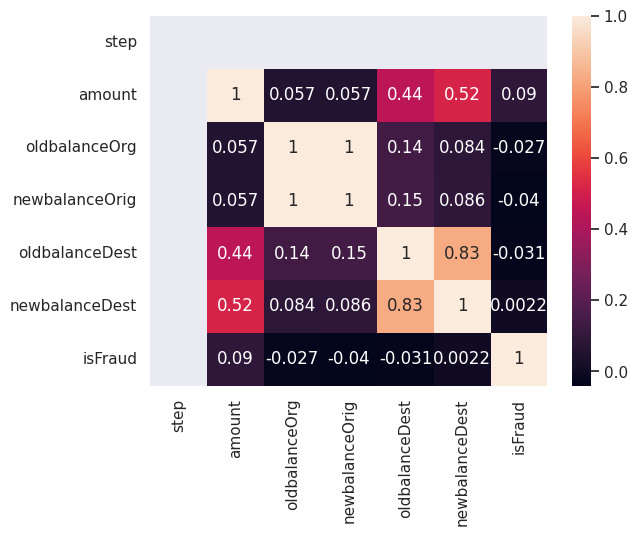

In [56]:
sns.heatmap(sub_df.corr(), annot = True) 

## Correlation Interpretation
### The Heatmap represents the correlation between all numerical varialbes together. The number which is closer to 1 means these two varialbes are strongly positive correlated. The correlation value which is closer to 0 tells us that the two variables are not correlated. 

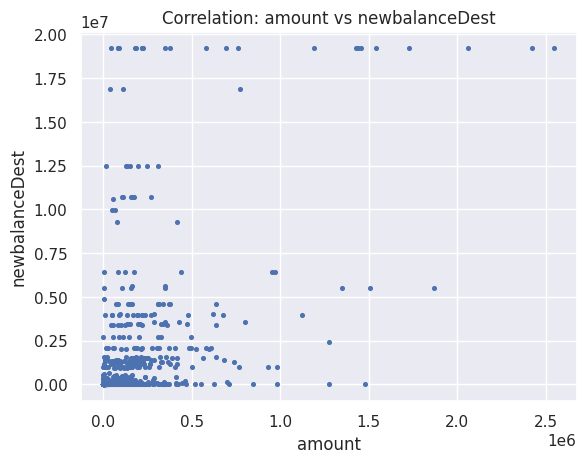

In [57]:
import matplotlib.pyplot as plt

plt.scatter(sub_df['amount'], sub_df['newbalanceDest'], s = 7)
plt.title("Correlation: amount vs newbalanceDest")
plt.xlabel("amount")
plt.ylabel("newbalanceDest")
plt.show()


### From plot, When the amount of transction is not too large, under 1M, the two varialbes are strongly correlated. That means when the newbalacneDest value is too large, then there are very few transactions or deposit to that account    

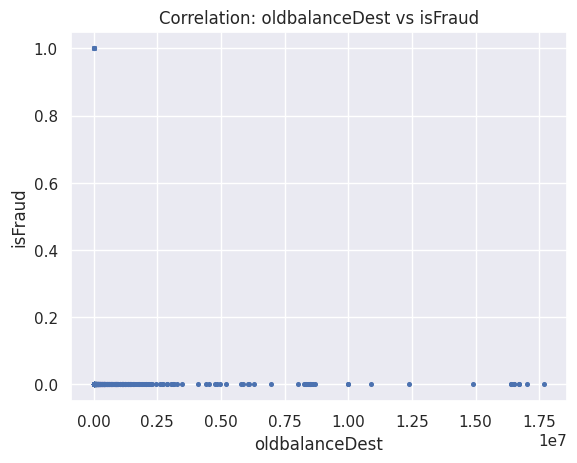

In [58]:
plt.scatter(sub_df['oldbalanceDest'], sub_df['isFraud'], s = 7)
plt.title("Correlation: oldbalanceDest vs isFraud")
plt.xlabel("oldbalanceDest")
plt.ylabel("isFraud")
plt.show()

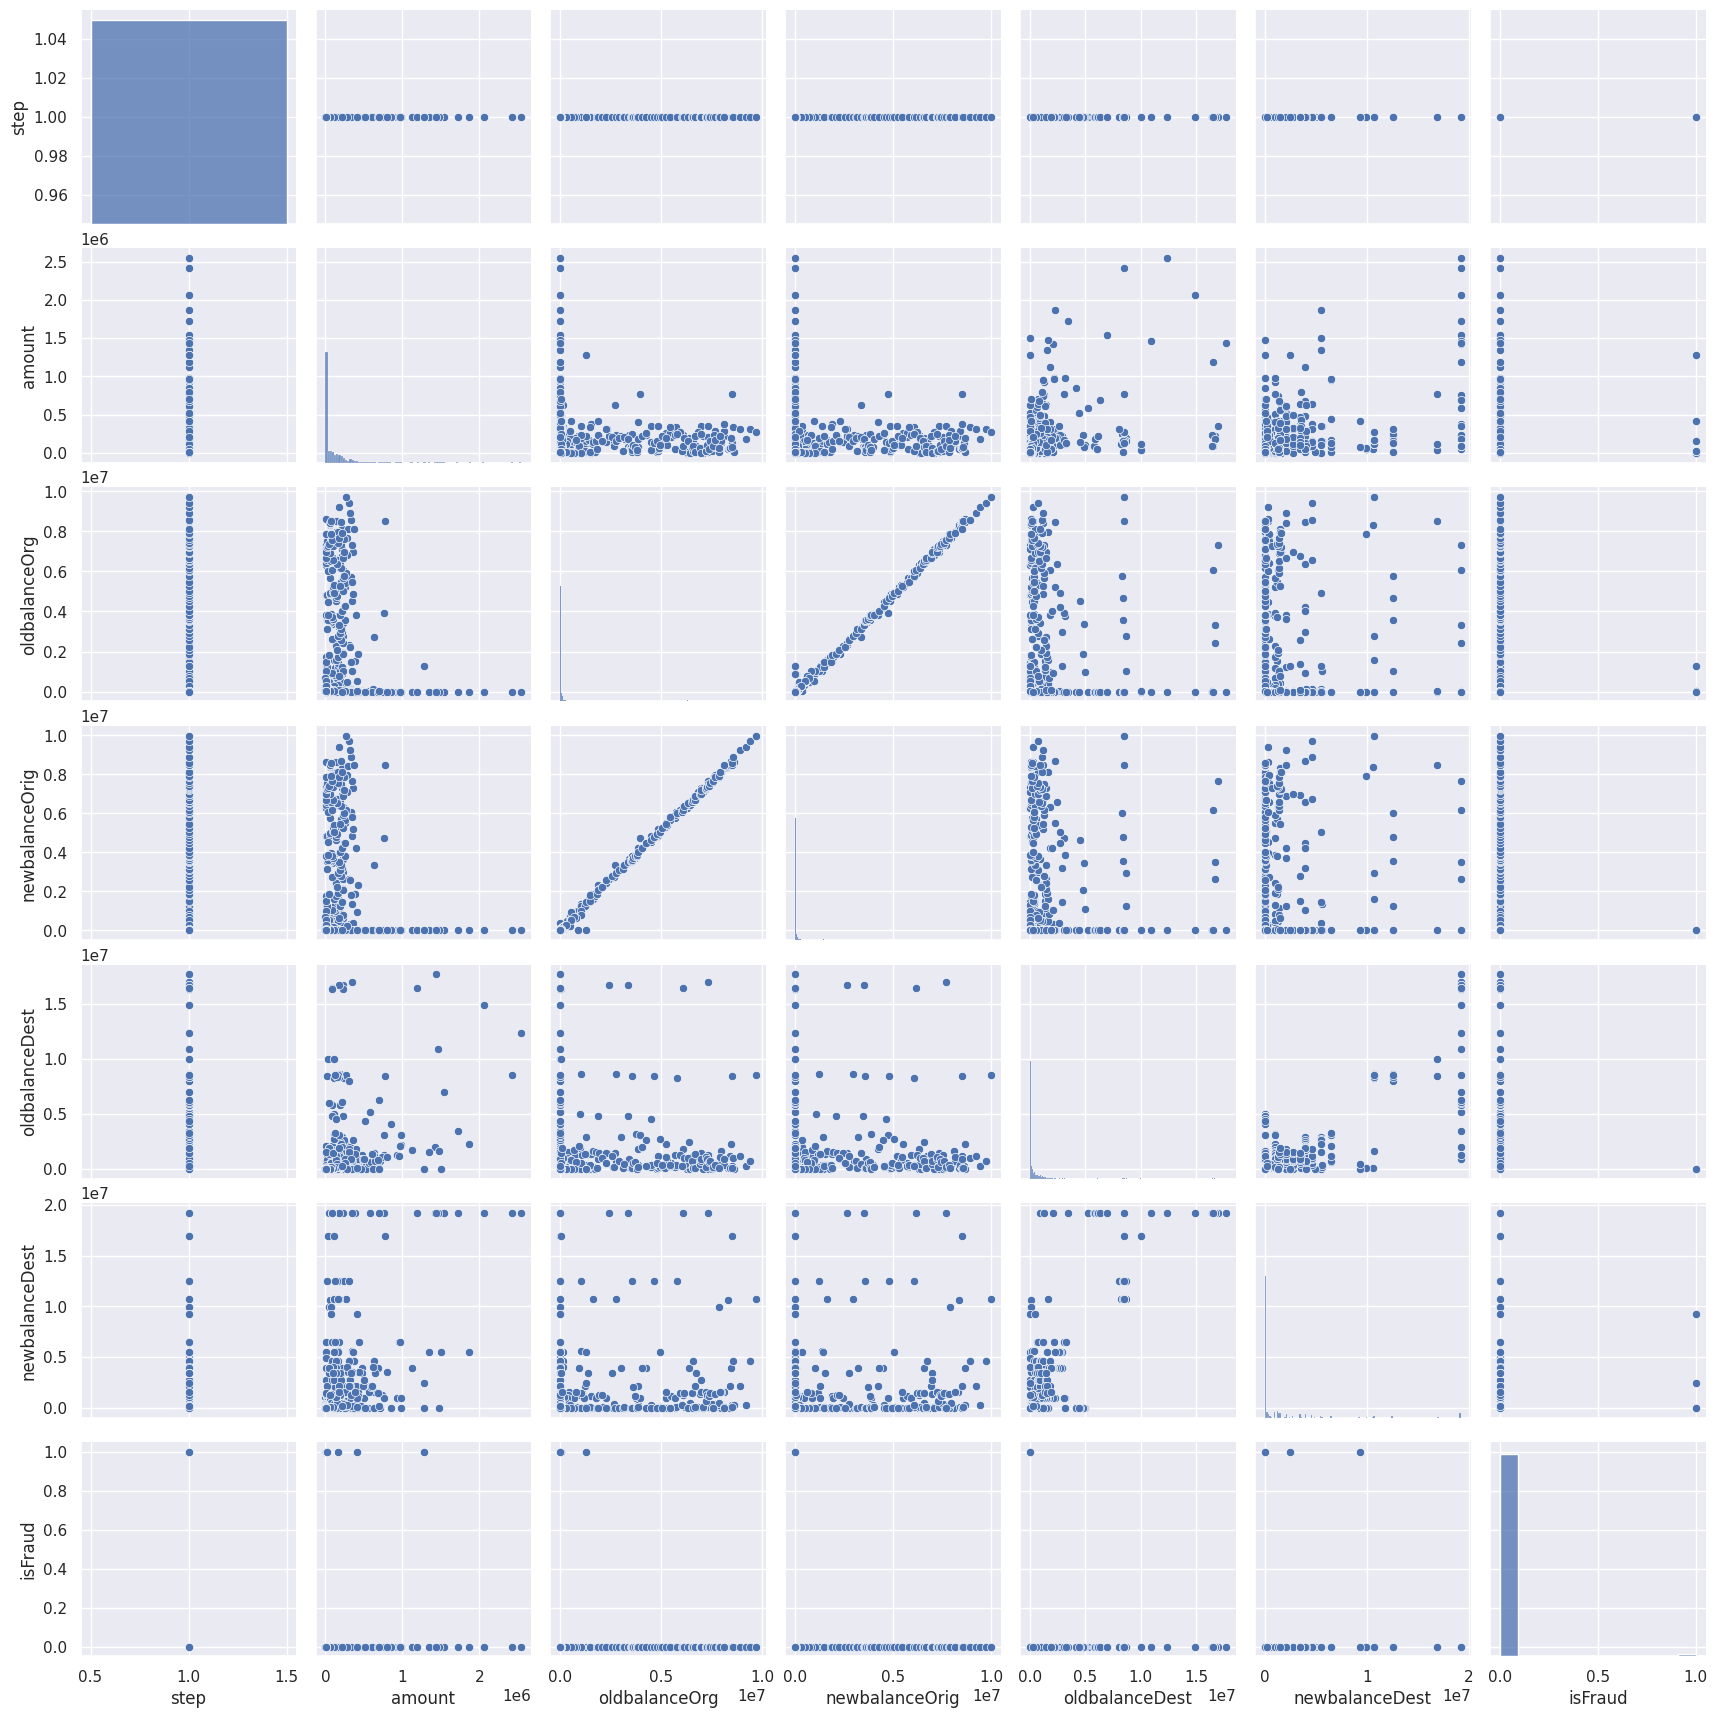

In [59]:
sns.pairplot(sub_df)

### Looking at this plot, we see that there is only one point for the variable isFraud because this variable just has two unique values, 0 or 1.
### The point is scattered away from the plot of the oldbalanceDest and this is corroborated by the fact that the correlation coefficient for this pair is close to 0.
### Also, the single point at the upper left corner tells us that when the value of oldbalanceDest increases, further going to right, the value of isFraud is further to the left, which is supported by the fact that the correlation coefficient for this pair is negative (-0.031)

In [60]:
sub_df1 = new_df.iloc[:20000]

sub_df1.shape

(20000, 10)

In [61]:
corr1 = sub_df1['amount'].corr(sub_df1['oldbalanceOrg'])

display(corr)

0.057465958051932775

In [62]:
sub_df1.corr() 


/tmp/ipykernel_137/1118181706.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sub_df1.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.067545,-0.038007,-0.038375,-0.012620,0.030528,-0.039192
amount,0.067545,1.000000,0.054308,0.035146,0.340439,0.449894,0.101625
oldbalanceOrg,-0.038007,0.054308,1.000000,0.997794,0.166233,0.120893,-0.005229
newbalanceOrig,-0.038375,0.035146,0.997794,1.000000,0.171693,0.122769,-0.022207
oldbalanceDest,-0.012620,0.340439,0.166233,0.171693,1.000000,0.907202,-0.015409
newbalanceDest,0.030528,0.449894,0.120893,0.122769,0.907202,1.000000,-0.009388
isFraud,-0.039192,0.101625,-0.005229,-0.022207,-0.015409,-0.009388,1.000000


In [63]:
sub_df.corr() 

/tmp/ipykernel_137/1540764471.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sub_df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,NaN,1.000000,0.057466,0.057246,0.440153,0.515642,0.089688
oldbalanceOrg,NaN,0.057466,1.000000,0.998889,0.139919,0.084473,-0.026537
newbalanceOrig,NaN,0.057246,0.998889,1.000000,0.145127,0.086371,-0.039657
oldbalanceDest,NaN,0.440153,0.139919,0.145127,1.000000,0.826707,-0.030532
newbalanceDest,NaN,0.515642,0.084473,0.086371,0.826707,1.000000,0.002209
isFraud,NaN,0.089688,-0.026537,-0.039657,-0.030532,0.002209,1.000000


/tmp/ipykernel_137/433119671.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  h1 = sns.heatmap(sub_df1.corr(), annot = True)


<AxesSubplot: >

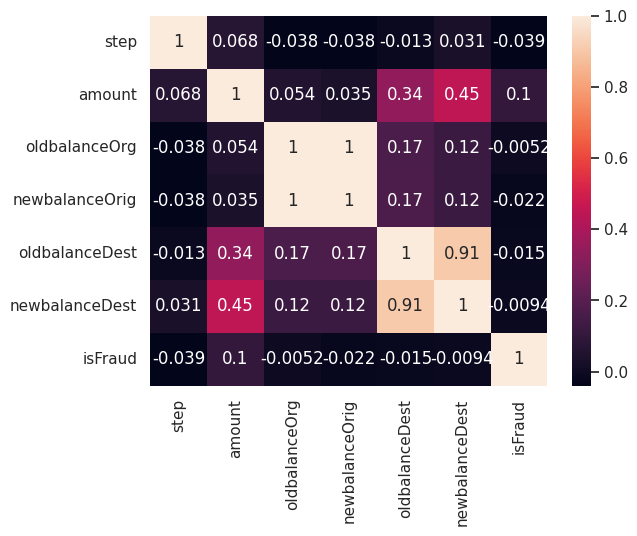

In [64]:
h1 = sns.heatmap(sub_df1.corr(), annot = True) 

h1

/tmp/ipykernel_137/220771305.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g1 = sns.heatmap(sub_df1.corr(),cmap="YlGnBu", annot = True, cbar=False,ax=ax1)
/tmp/ipykernel_137/220771305.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g2 = sns.heatmap(sub_df.corr(),cmap="YlGnBu",annot = True, cbar=False,ax=ax2)


Text(0.5, 21.249999999999993, '')

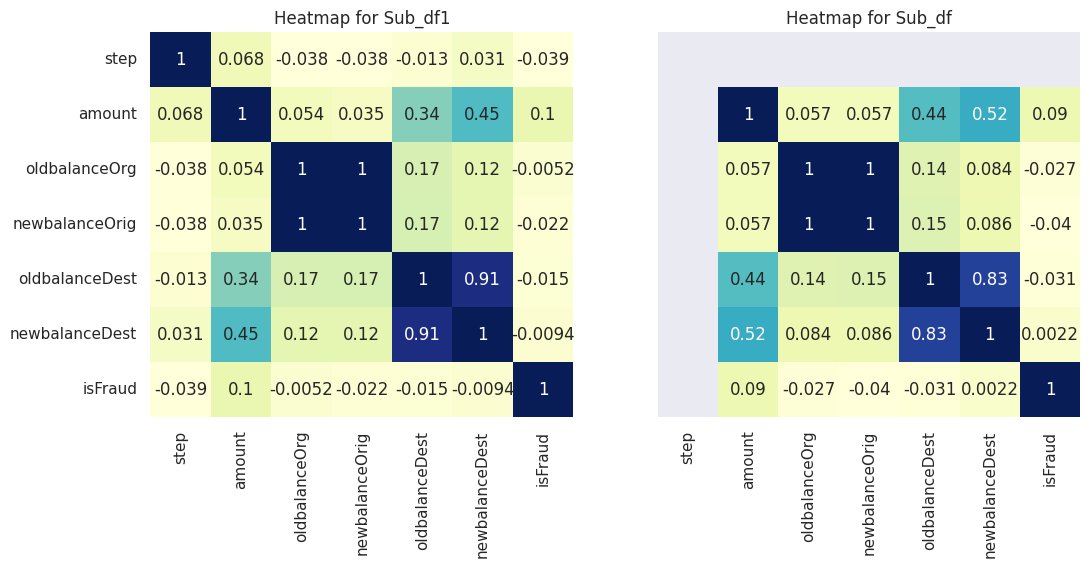

In [65]:
# sns.heatmap(sub_df1.corr(), annot = True) 

# sns.heatmap(sub_df.corr(), annot = True) 

f,(ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(12,5))
g1 = sns.heatmap(sub_df1.corr(),cmap="YlGnBu", annot = True, cbar=False,ax=ax1)
g1.set_title('Heatmap for Sub_df1')
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(sub_df.corr(),cmap="YlGnBu",annot = True, cbar=False,ax=ax2)
g2.set_title('Heatmap for Sub_df')
g2.set_ylabel('')
g2.set_xlabel('')


/tmp/ipykernel_137/1941133742.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, annot_kws = {'fontsize': 9})


<AxesSubplot: >

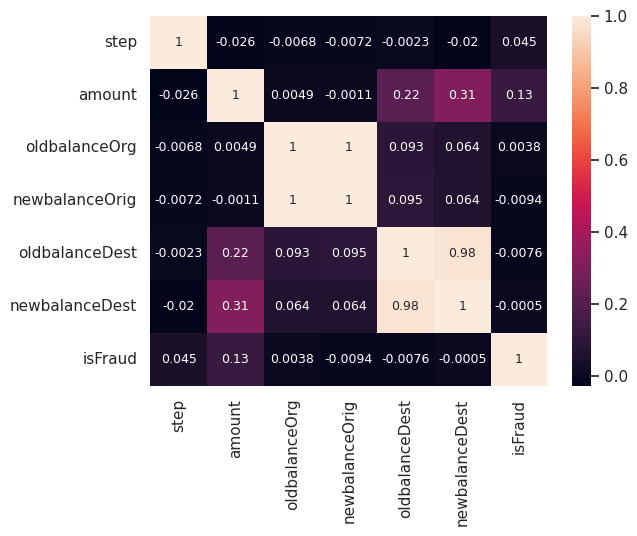

In [66]:
sns.heatmap(df.corr(), annot = True, annot_kws = {'fontsize': 9}) 

Text(0, 0.5, 'newbalanceDest')

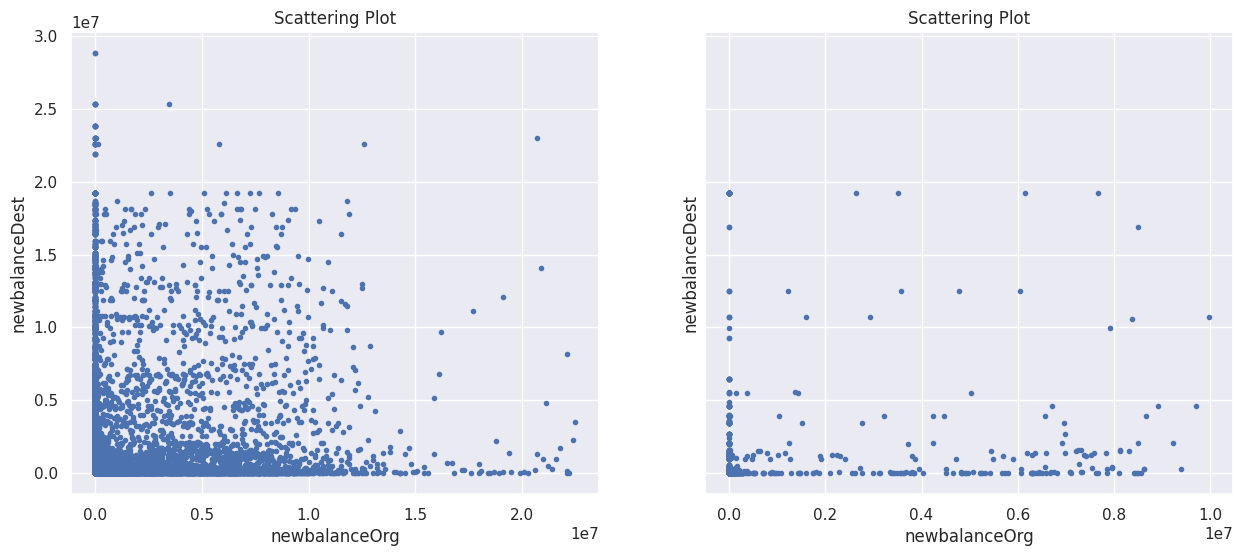

In [67]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
ax1.scatter(sub_df1['newbalanceOrig'], sub_df1['newbalanceDest'], s =9)
ax1.set_title("Scattering Plot")
ax1.set_xlabel('newbalanceOrg')
ax1.set_ylabel('newbalanceDest')

ax2.scatter(sub_df['newbalanceOrig'], sub_df['newbalanceDest'], s =9)
ax2.set_title("Scattering Plot")
ax2.set_xlabel('newbalanceOrg')
ax2.set_ylabel('newbalanceDest')

## Comparison the correlation from the two data sets
### Sub_df1 has values for step while the sub_df doesn't have because when haveing more records the correlation coefficients have changed.
### From the heatmap plot, the values under the diagoanl in sub_df1 a lit larger than that of in the sub_df because when there are more records, the number of transactions increase. This means there is more money the destination.
### On the contrary, the values above the diagoanl in sub_df1 a lit smaller than that of in the sub_df because there is less money in Origin account.

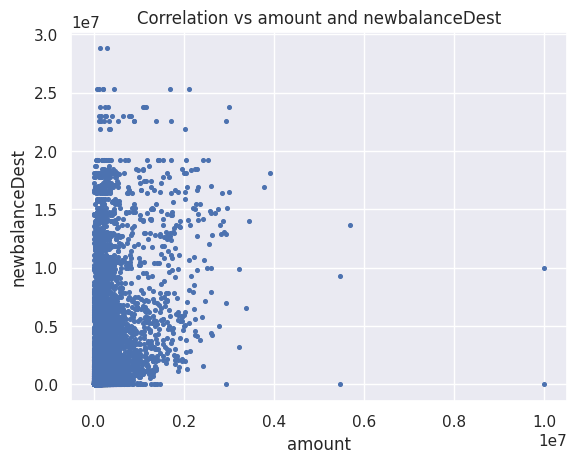

In [68]:
import matplotlib.pyplot as plt

plt.scatter(sub_df1['amount'], sub_df1['newbalanceDest'], s = 7)
plt.title("Correlation vs amount and newbalanceDest")
plt.xlabel("amount")
plt.ylabel("newbalanceDest")
plt.show()


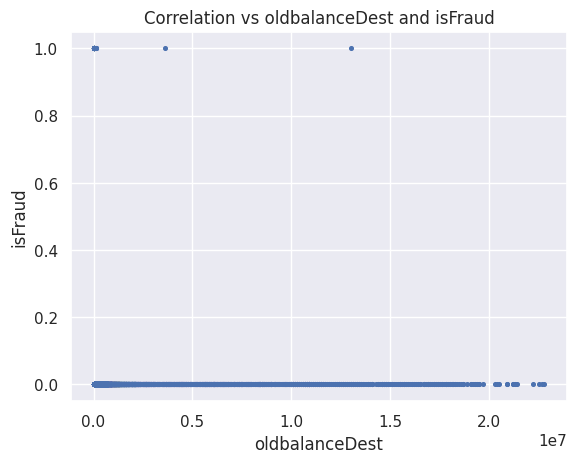

In [69]:
plt.scatter(sub_df1['oldbalanceDest'], sub_df1['isFraud'], s = 7)
plt.title("Correlation vs oldbalanceDest and isFraud")
plt.xlabel("oldbalanceDest")
plt.ylabel("isFraud")
plt.show()

# EDA Summary

### 1. Missing Values: There are missing values. Specifically, there are 5 missing values in column name at rows 3, 8, 13, 18, and 23. There are 3 missing values in column oldbalanceOrig at rows 9, 19, and 29. There are also 3 missing values in nameDest at rows 10, 20 , and 30.
### 2. By looking at histogram plots and the nature of the dataset, we decided to use mean for the imputation for the missing values.
### 3. Hostogram plots: Almost features have left-skew histogram. This means there may have some data points on right but the count is very small, and they are not shown in the histograms.
### 4. Correlation Analysis. We have conducted both scatter plots and Heatmap matrices for all pairs. We saw that there are some paris that are highly positive correlated such as oldbalanceDest and newbalanceDest features. There seeems no negative correlation between the independent variables and bwtween the independent variables and the target variables because the negative correlation coefficients are very close to zero.
### Again, this is corbororated by the reality that the oldbalceOrig and the isFraud is unlikely correlated.

In [70]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.640000,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.280000,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.000000,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,158667.712672,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.140000,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [71]:
model_df = df.drop(['step', 'nameOrig', 'nameDest'], axis = 1)

model_df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.640000,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.280000,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.000000,181.0,0.00,0.0,0.0,1
3,CASH_OUT,158667.712672,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.140000,41554.0,29885.86,0.0,0.0,0


In [72]:
x = model_df['isFraud'].value_counts()[0]

y = model_df['isFraud'].value_counts()[1]

print(x)
print(y)

1047433
1142


<AxesSubplot: >

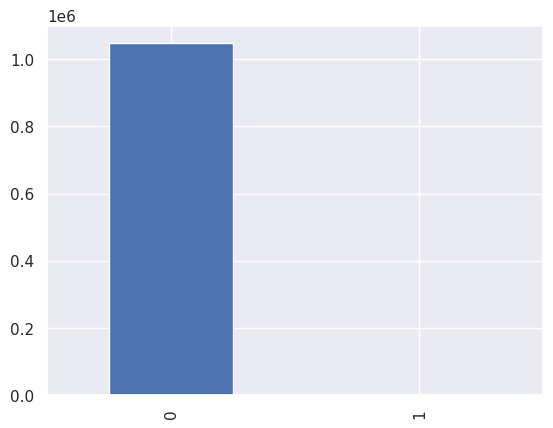

In [73]:
model_df['isFraud'].value_counts().plot(kind='bar')

# There are several ways for encoding. 5 basic encoding methods:
## One-Hot ncoding
## Binary Encoding
## Ordianal Encoding
## Quantile Encoding
## Counting Encoding

## Replace column 'type' with a numerical column using onehot-encoder 

In [74]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
model_df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [76]:
# Perform one-hot encoding using pandas
one_hot_encoded = pd.get_dummies(model_df['type'])

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([model_df, one_hot_encoded], axis=1)

df_encoded.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,PAYMENT,9839.640000,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,PAYMENT,1864.280000,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,TRANSFER,181.000000,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,CASH_OUT,158667.712672,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,PAYMENT,11668.140000,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [77]:
df_final = df_encoded.drop('type', axis = 1)

df_final.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,9839.640000,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1864.280000,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,181.000000,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,158667.712672,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,11668.140000,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


# Train-Test-Split

### Why don't we use the entire dataset? We need training dataset and test dataset because we want estimate the performance of the model when there are extra data points that were not seen before. In other word, the trained model with the entire dataset might not be very reliable when there are new dat points added.

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
y = df_final['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [80]:
X = df_final.drop('isFraud', axis =1)
X.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,9839.640000,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1864.280000,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,181.000000,181.0,0.00,0.0,0.0,0,0,0,0,1
3,158667.712672,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,11668.140000,41554.0,29885.86,0.0,0.0,0,0,0,1,0


## X and y are split into two subsets called X_train and X_test (y_train and y_test). The size of the test dataset sepends how large the dataset we are working on. In this problem we pick 33% for the test dataset. 

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [82]:
X_train.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
664918,352265.95,223595.69,0.00,1830686.45,2182952.39,0,1,0,0,0
741964,6839.81,0.00,0.00,0.00,0.00,0,0,0,1,0
314050,189558.87,1148217.48,1337776.35,608722.11,419163.25,1,0,0,0,0
631759,11593.26,0.00,0.00,0.00,0.00,0,0,0,1,0
555223,109714.54,2254.00,0.00,85409.59,195124.14,0,1,0,0,0


# Model Training

### Train the logistic regression
### Evaluate/calculate model performance with classification metrics
### Train the decision tree AND Evaluate/calculate model performance with classification metrics
### Train the random forest AND Evaluate/calculate model performance with classification metrics
### Train the XGBoost AND Evaluate/calculate model performance with classification metrics


# Train a logistic regression model on the training set

### Instantiate the model

In [83]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0, max_iter=250)

## Fit the model

## fit(X,y): Establish a relation between dependent variable and independent varialbes given a dataset.
## logreg.fit(X,y): Establish a relation between dependent variable and independent varialbes to predict the log of the odds given a dataset.
### fitting = learning = training = developing the model.


In [84]:
logreg.fit(X_train, y_train)

## predict(X_test): To predict the labels of X_test, given the independent testing dataset.
## logreg.precict (X_test): To predict the labels of X_test in logreg model, given the independent testing dataset

y_pred_test = logreg.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

## Interpretation
### X_train: The training dataset containing independent variables that are used to train the model.
### y_train: The training dataset containing dependent variables that are used to train the model.
### X_test: The testing dataset containing independent variables that are used to test the model.
### y_test: The testing dataset containing dependent variables that are used to test the model.

## The model predicts it is Not Fraud

In [85]:
# probability of getting output as 0 - Not Fraud

logreg.predict_proba(X_test)

array([[1.00000000e+000, 3.59376188e-201],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 2.73798382e-028],
       ...,
       [1.00000000e+000, 1.15585677e-105],
       [1.00000000e+000, 9.37429067e-157],
       [1.00000000e+000, 1.28596795e-062]])

In [86]:
# Predict the logarithm of probability estimates 

logreg.predict_log_proba(X_test)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1402: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


array([[   0.        , -461.54040416],
       [   0.        ,          -inf],
       [   0.        ,  -63.46516079],
       ...,
       [   0.        , -241.62659291],
       [   0.        , -359.26788869],
       [   0.        , -142.50876406]])

In [87]:
from sklearn.metrics import classification_report

In [88]:
target_names = ['notFraud-0', 'isFraud-1']
# y_true = y_test
# y_pred = y_test_pred
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

  notFraud-0       1.00      1.00      1.00    345655
   isFraud-1       0.61      0.81      0.70       375

    accuracy                           1.00    346030
   macro avg       0.81      0.90      0.85    346030
weighted avg       1.00      1.00      1.00    346030



In [89]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    345655
           1       0.61      0.81      0.70       375

    accuracy                           1.00    346030
   macro avg       0.81      0.90      0.85    346030
weighted avg       1.00      1.00      1.00    346030



# Confusion Matrix with Baseline/Orginal Dataset
### The input arguments for confusion_matrix is y_true and y_pred
### confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

In [90]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives(TP) = ', cm[0,0])

print('\nTrue Positives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[345465    190]
 [    73    302]]

True Negatives(TP) =  345465

True Positives(TN) =  302

False Positives(FP) =  190

False Negatives(FN) =  73


In [91]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print(tn, fp, fn, tp)

345465 190 73 302


<AxesSubplot: >

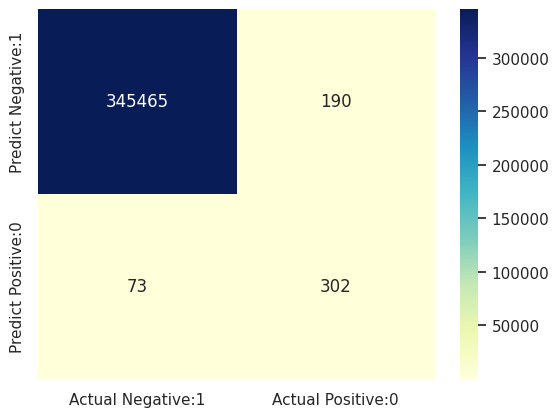

In [92]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative:1', 'Actual Positive:0'], 
                                 index=['Predict Negative:1', 'Predict Positive:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification Accuracy

### Accuracy =  Correct prediction / Total prediction

In [93]:
Accuracy = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])

print(Accuracy)

0.9992399502933271


### Precision = No of true PP that are true and it's true in fact / Total No of PP) = TP/(TP+FP)
### Look at the Model (The bottom for the model)

In [94]:
Precision = (cm[1,1])/(cm[1,1] + cm[0,1])

print(Precision)

0.6138211382113821


### Recall = True Positive Rate = Sensitivity = TP/(TP+FN)
### Look at the Dataset (The bottom for the dataset)

In [95]:
Recall = (cm[1,1])/(cm[1,1] + cm[1,0])

print(Recall)

0.8053333333333333


### F1_Score = 2(Precision.Recall)/(Precision + Recall)

In [96]:
F1_Score = 2*(Precision*Recall)/(Precision+Recall)
print(F1_Score)

0.6966551326412918


# Over-Sampling

### The data set is not balanced. We try to make it balanced.
### Undersampling method: Take a random sample of the original dataset in which the nmuber of majority calss is about the number of minority class.
### Disadvantage: Reduce the data points. Then modelis biased.

In [97]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_resampled1, y_resampled1 = ros.fit_resample(X_train, y_train)

In [98]:
print(X_resampled1.shape)

print(y_resampled1.shape)

(1403556, 10)
(1403556,)


In [99]:
from collections import Counter
print(sorted(Counter(y_resampled1).items()))

[(0, 701778), (1, 701778)]


# Under-Sampling

### The data set is not balanced. We try to make it balanced.
### Undersampling method: Take a random sample of the original dataset in which the nmuber of majority calss is about the number of minority class.
### Disadvantage: Reduce the data points. Then modelis biased.

In [100]:
from imblearn.under_sampling import ClusterCentroids

In [101]:
# cc = ClusterCentroids(random_state=0)

In [102]:
# X_resampled2, y_resampled2 = cc.fit_resample(X_train, y_train)

# print(sorted(Counter(y_resampled2).items()))

## SMOTE-Synthetic Minority Oversampling Technique

### This method creates fake data points based on the original data points for which the new data points are colinear with existing data points.
### Disadvantage: Because the new data points are created depending on the existing data points, it violates the independent assumption.

In [103]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [104]:
X_resampled3, y_resampled3 = SMOTE().fit_resample(X_train, y_train)

In [105]:
print(sorted(Counter(y_resampled3).items()))

[(0, 701778), (1, 701778)]


# Train the model with resampled dataset

In [106]:
logreg.fit(X_resampled1, y_resampled1)

y_pred_test1 = logreg.predict(X_test)
y_pred_test1

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
target_names = ['notFraud', 'isFraud']

print(classification_report(y_test, y_pred_test1, target_names=target_names))

              precision    recall  f1-score   support

    notFraud       1.00      0.92      0.96    345655
     isFraud       0.01      0.96      0.03       375

    accuracy                           0.92    346030
   macro avg       0.51      0.94      0.49    346030
weighted avg       1.00      0.92      0.96    346030



In [108]:
print(classification_report(y_test, y_pred_test1))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    345655
           1       0.01      0.96      0.03       375

    accuracy                           0.92    346030
   macro avg       0.51      0.94      0.49    346030
weighted avg       1.00      0.92      0.96    346030



In [109]:
logreg.fit(X_resampled3, y_resampled3)

y_pred_test3 = logreg.predict(X_test)
y_pred_test3

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
print(classification_report(y_test, y_pred_test3))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    345655
           1       0.01      0.96      0.03       375

    accuracy                           0.93    346030
   macro avg       0.51      0.94      0.50    346030
weighted avg       1.00      0.93      0.96    346030



# Confision Matrix with Resampled Dataset 1

In [111]:
cm1 = confusion_matrix(y_test, y_pred_test1)

In [112]:
print('Confusion Matrix\n\n', cm1)

Confusion Matrix

 [[318275  27380]
 [    15    360]]


In [113]:
print('\n True Negative', cm1[0,0])

print('\n True Positive', cm1[1,1])

print('\n False Negative', cm1[1,0])

print('\n False Positive', cm1[0,1])


 True Negative 318275

 True Positive 360

 False Negative 15

 False Positive 27380


# Calcualating Metrics 1

In [114]:
Accuracy_OVER = (cm1[0,0]+ cm1[1,1])/( cm1[0,0]+ cm1[1,1]+ cm1[1,0]+ cm1[0,1])
print('\n Accuracy_OVER: ', Accuracy_OVER)

Precision_OVER = (cm1[1,1])/(cm1[1,1]+cm1[0,1])
print('\n Precision_OVER: ', Precision_OVER)

Recall_OVER = cm1[1,1]/(cm1[1,1]+cm1[1,0])
print('\n Recall_OVER: ', Recall_OVER)

F1_score_OVER = 2*(Precision_OVER*Recall_OVER)/(Precision_OVER+Recall_OVER)
print('\n F1_Score_OVER: ', F1_score_OVER)


 Accuracy_OVER:  0.9208305638239459

 Precision_OVER:  0.012977649603460706

 Recall_OVER:  0.96

 F1_Score_OVER:  0.02560910545971901


# Confusion Matrix with Resampled Dataset 3

In [115]:
cm3 = confusion_matrix(y_test, y_pred_test3)

In [116]:
print('Confusion Matrix \n \n', cm3)

print('\n True Negative: ', cm3[0,0])

print('\n True Positive: ', cm3[1,1])

print('\n False Negative: ', cm3[1,0])

print('\n False Positive: ', cm3[0,1])



Confusion Matrix 
 
 [[321121  24534]
 [    16    359]]

 True Negative:  321121

 True Positive:  359

 False Negative:  16

 False Positive:  24534


## Calculating Metrics with Resampled Dataset 3

In [117]:
Accuracy_SMOTE = (cm3[0,0]+cm3[1,1])/(cm3[0,0]+cm3[1,1]+cm3[1,0]+cm3[0,1])
print('\n Accuracy_SMOTE: ', Accuracy_SMOTE)

Precision_SMOTE = (cm3[1,1])/(cm3[1,1]+cm3[0,1])
print('\n Precision_SMOTE: ', Precision_SMOTE)

Recall_SMOTE = (cm3[1,1])/(cm3[1,1]+cm3[1,0])
print('\n Recall_SMOTE: ', Recall_SMOTE)

F1_score_SMOTE = 2*(Precision_SMOTE*Recall_SMOTE)/(Precision_SMOTE+Recall_SMOTE)
print('\n F1_score_SMOTE: ', F1_score_SMOTE)


 Accuracy_SMOTE:  0.9290523943010721

 Precision_SMOTE:  0.014421724982926928

 Recall_SMOTE:  0.9573333333333334

 F1_score_SMOTE:  0.028415387050815262


## Summary
### When we compare all metrics in all three methods of resampling, we see that the baseline method (with the original-unbalanced dataset) gives the best performance. This implies the logistic regression is not a good model for this problem.

# Model Training with Decision Tree

In [118]:
from sklearn import tree

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [120]:
def DTModelTraining(X,y,X_test,Method):    
    if Method == 'OverSampling':
        ros = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = ros.fit_resample(X, y)
    elif Method == 'SMOTE':
        X_resampled, y_resampled = SMOTE().fit_resample(X, y)
    else:
        X_resampled, y_resampled = X, y
   
    DeciModel= tree.DecisionTreeClassifier(random_state = 0)
    DeciModel = DeciModel.fit(X_resampled, y_resampled)
    
    y_pred_test = DeciModel.predict(X_test)
    
    return DeciModel, y_pred_test   

In [121]:
def DTCalculatingConfMatrix(y1,y2,X_train,y_train,X_test,Method):
    """
    This function calculates Confusion Matrix
    @y1: y_true = y_test:The testing dataset that contains the independent variable, a Numpy array
    @y2: y_pred, a Numpy array
    @X_train: The training dataset of the model that contains the independent variables
    @y_train: The training dataset of the model that contains the dependent variable
    @X_test: The testing dataset of the model that contains the independent variables
    @Method: There are four methods (Baseline UnderSampling, OverSampling, SMOTE)
    """
    D, y2 = DTModelTraining(X_train,y_train,X_test, Method = Method)
    
    confMat = confusion_matrix(y1,y2)
    
    Accuracy = (confMat[0,0]+confMat[1,1])/(confMat[0,0]+confMat[1,1]+confMat[1,0]+confMat[0,1])
    print('Accuracy: ', Accuracy)

    Precision = (confMat[1,1])/(confMat[1,1]+confMat[0,1])
    print('Precision: ', Precision)

    Recall = (confMat[1,1])/(confMat[1,1]+confMat[1,0])
    print('Recall: ', Recall)

    F1_score = 2*(Precision*Recall)/(Precision+Recall)
    print('F1_score: ', F1_score)

    return Accuracy, Precision, Recall, F1_Score

In [122]:
for Met in [None, 'OverSampling', 'SMOTE']:
    print(f'Resampling Techniques: {Met} \n') 
    Accuracy, Precision, Recall, F1_Score = DTCalculatingConfMatrix(y_test, y_pred_test, X_train, y_train,X_test, Method = Met)
    print('\n-------------------------------------------\n')

Resampling Techniques: None 

Accuracy:  0.9994595844290958
Precision:  0.7513368983957219
Recall:  0.7493333333333333
F1_score:  0.7503337783711616

-------------------------------------------

Resampling Techniques: OverSampling 

Accuracy:  0.9995058231945207
Precision:  0.8017751479289941
Recall:  0.7226666666666667
F1_score:  0.7601683029453016

-------------------------------------------

Resampling Techniques: SMOTE 

Accuracy:  0.9982891656792764
Precision:  0.38037486218302097
Recall:  0.92
F1_score:  0.5382215288611544

-------------------------------------------



# Summary in Decision Tree Model

### When all metrics in three different techniques are compared, I think the Decision Tree is a good model for this problem and the OverSampling technique is  the best choice. 

---

# Training the Model with Random Forrest 

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
def RFModelTraining(X,y,X_test,Method):    
    if Method == 'OverSampling':
        ros = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = ros.fit_resample(X, y)
    elif Method == 'SMOTE':
        X_resampled, y_resampled = SMOTE().fit_resample(X, y)
    else:
        X_resampled, y_resampled = X, y
   
    RFModel= RandomForestClassifier(random_state = 0)
    RFModel = RFModel.fit(X_resampled, y_resampled)
    
    # Need to do the cross validation on the training dataset for X and y.
    # Based on cv_precision_score and cv_recall_score, we compare these two scores with precision_score and (final) recall_score calculated by using X_test and y_test
    # If cv_precision_score and cv_recall_score are higher than final precision_score and final recall_score, then the model is overfitting
        ## To mitigate overfitting, you can increase the size of the dataset and either simply the model or apply Lasso or Ridge regularization
        ## Or reduce the number of features (varialbes/comlumns) or add early stopping or use ensemble model 
    # If cv_precision_score and cv_recall_score are lower than final precision_score and final recall_score, then the model is underfitting
        ## To mitigate underfitting, you can increase the model complexity (How complex the EDA process is) or add more features,
        ## relax the strength of regularization or train the model longer, transform or scale features
        ## Collect more data and tune/adjust hyperparameters
    y_pred_test = RFModel.predict(X_test)
    
    return RFModel, y_pred_test   

In [125]:
def RFCalculatingConfMatrix(y1,y2,X_train,y_train,X_test,Method):
    """
    This function calculates Confusion Matrix
    @y1: y_true = y_test:The testing dataset that contains the independent variable, a Numpy array
    @y2: y_pred, a Numpy array
    @X_train: The training dataset of the model that contains the independent variables
    @y_train: The training dataset of the model that contains the dependent variable
    @X_test: The testing dataset of the model that contains the independent variables
    @Method: There are four methods (Baseline UnderSampling, OverSampling, SMOTE)
    """
    D, y2 = RFModelTraining(X_train,y_train,X_test, Method = Method)
    
    confMat = confusion_matrix(y1,y2)
    
    Accuracy = (confMat[0,0]+confMat[1,1])/(confMat[0,0]+confMat[1,1]+confMat[1,0]+confMat[0,1])
    print('Accuracy: ', Accuracy)

    Precision = (confMat[1,1])/(confMat[1,1]+confMat[0,1])
    print('Precision: ', Precision)

    Recall = (confMat[1,1])/(confMat[1,1]+confMat[1,0])
    print('Recall: ', Recall)

    F1_score = (2*Precision*Recall)/(Precision+Recall)
    print('F1_score: ', F1_score)

    return Accuracy, Precision, Recall, F1_Score

In [126]:
for Met in [None, 'OverSampling', 'SMOTE']:
    print(f'Resampling Techniques: {Met} \n') 
    Accuracy, Precision, Recall, F1_Score = RFCalculatingConfMatrix(y_test, y_pred_test, X_train, y_train,X_test, Method = Met)
    print('\n-------------------------------------------\n')

Resampling Techniques: None 

Accuracy:  0.9996098604167268
Precision:  0.9347826086956522
Recall:  0.688
F1_score:  0.7926267281105991

-------------------------------------------

Resampling Techniques: OverSampling 

Accuracy:  0.9995983007253706
Precision:  0.9125874125874126
Recall:  0.696
F1_score:  0.7897125567322237

-------------------------------------------

Resampling Techniques: SMOTE 

Accuracy:  0.9983585238274139
Precision:  0.38633686690223795
Recall:  0.8746666666666667
F1_score:  0.5359477124183006

-------------------------------------------



In [127]:
ori_df.shape

(1048575, 11)

# Trtaining the Model with XGBoost

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
def XGBModelTraining(X,y,X_test,Method):    
    if Method == 'OverSampling':
        ros = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = ros.fit_resample(X, y)
    elif Method == 'SMOTE':
        X_resampled, y_resampled = SMOTE().fit_resample(X, y)
    else:
        X_resampled, y_resampled = X, y
   
    XGBModel= GradientBoostingClassifier(random_state = 0)
    XGBModel = XGBModel.fit(X_resampled, y_resampled)
    
    y_pred_test = XGBModel.predict(X_test)
    
    return XGBModel, y_pred_test   

In [130]:
def XGBCalculatingConfMatrix(y1,y2,X_train,y_train,X_test,Method):
    """
    This function calculates Confusion Matrix
    @y1: y_true = y_test:The testing dataset that contains the independent variable, a Numpy array
    @y2: y_pred, a Numpy array
    @X_train: The training dataset of the model that contains the independent variables
    @y_train: The training dataset of the model that contains the dependent variable
    @X_test: The testing dataset of the model that contains the independent variables
    @Method: There are four methods (Baseline UnderSampling, OverSampling, SMOTE)
    """
    D, y2 = XGBModelTraining(X_train,y_train,X_test, Method = Method)
    
    confMat = confusion_matrix(y1,y2)
    
    Accuracy = (confMat[0,0]+confMat[1,1])/(confMat[0,0]+confMat[1,1]+confMat[1,0]+confMat[0,1])
    print('Accuracy: ', Accuracy)

    Precision = (confMat[1,1])/(confMat[1,1]+confMat[0,1])
    print('Precision: ', Precision)

    Recall = (confMat[1,1])/(confMat[1,1]+confMat[1,0])
    print('Recall: ', Recall)

    F1_score = (2*Precision*Recall)/(Precision+Recall)
    print('F1_score: ', F1_score)

    return Accuracy, Precision, Recall, F1_Score

In [131]:
for Met in [None, 'OverSampling', 'SMOTE']:
    print(f'Resampling Techniques: {Met} \n') 
    Accuracy, Precision, Recall, F1_Score = XGBCalculatingConfMatrix(y_test, y_pred_test, X_train, y_train,X_test, Method = Met)
    print('\n-------------------------------------------\n')

Resampling Techniques: None 

Accuracy:  0.9989827471606508
Precision:  0.6055045871559633
Recall:  0.176
F1_score:  0.2727272727272727

-------------------------------------------

Resampling Techniques: OverSampling 

Accuracy:  0.9782388810218767
Precision:  0.04640547736782046
Recall:  0.976
F1_score:  0.08859840232389252

-------------------------------------------

Resampling Techniques: SMOTE 

Accuracy:  0.9746409270872468
Precision:  0.03987730061349693
Recall:  0.9706666666666667
F1_score:  0.07660738714090287

-------------------------------------------



# Implementation the Hyper_Parameter

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [134]:
parameters = {'n_estimators':[100,150],
              'criterion': ('gini', 'entropy', 'log_loss'),
              'max_depth':[None,3,5]}

In [135]:
scoring = ['recall', 'precision']

In [136]:
RF = RandomForestClassifier(random_state = 0)

In [137]:
RF_clf = GridSearchCV(RF,
                      parameters,
                      scoring=scoring,
                      n_jobs=-1,
                      refit=False, # set to True if scoring just has one metric
                      cv=5, # cross Depend on your dataset size.
                      verbose=2)
                      #refit=True, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

In [138]:
RF_clf.fit(X_resampled, y_resampled) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...criterion=gini, max_depth=None, n_estimators=100; total time= 3.4min
[CV] END ...criterion=gini, max_depth=None, n_estimators=100; total time= 3.4min
[CV] END ...criterion=gini, max_depth=None, n_estimators=100; total time= 3.5min
[CV] END ...criterion=gini, max_depth=None, n_estimators=100; total time= 3.5min
[CV] END ...criterion=gini, max_depth=None, n_estimators=100; total time= 3.4min
[CV] END ...criterion=gini, max_depth=None, n_estimators=150; total time= 5.0min
[CV] END ...criterion=gini, max_depth=None, n_estimators=150; total time= 5.1min
[CV] END ...criterion=gini, max_depth=None, n_estimators=150; total time= 5.2min
[CV] END ......criterion=gini, max_depth=3, n_estimators=100; total time= 1.5min
[CV] END ......criterion=gini, max_depth=3, n_estimators=100; total time= 1.5min
[CV] END ......criterion=gini, max_depth=3, n_estimators=100; total time= 1.5min
[CV] END ......criterion=gini, max_depth=3, n_es

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [None, 3, 5],
                         'n_estimators': [100, 150]},
             refit=False, scoring=['recall', 'precision'], verbose=2)

In [139]:
#RF_clf.best_params_

In [140]:
#RF_clf.score_samples

In [141]:
RF_clf.cv_results_

{'mean_fit_time': array([202.06647186, 301.72038398,  89.15351224, 135.95206304,
        123.49099069, 186.18775496, 212.05513268, 329.19272399,
        100.27586093, 151.51227713, 140.27445092, 216.77691078,
        234.54563746, 351.32807097, 105.4756114 , 157.93602295,
        145.98326159, 203.3400548 ]),
 'std_fit_time': array([ 2.44714145,  3.72941759,  0.44011556,  0.75123917,  0.8262573 ,
         0.95107285,  4.05485565,  4.12770746,  1.09582996,  0.54895516,
         0.61621357,  3.22599113,  2.3987474 ,  1.46964933,  0.42084299,
         1.03881588,  0.82895238, 27.59028273]),
 'mean_score_time': array([3.67331924, 5.39576392, 2.34614282, 3.36887398, 2.73056774,
        3.96185513, 3.7436902 , 5.51530781, 2.41629453, 3.44197683,
        2.81484408, 4.22223644, 3.89500089, 5.7071734 , 2.456007  ,
        3.55602093, 2.86521883, 3.57203026]),
 'std_score_time': array([0.09347791, 0.05163866, 0.04269413, 0.05202119, 0.02067589,
        0.07227103, 0.06345994, 0.10062297, 0.0088

### Extract the best hyperparameter setting
### From 'rank_test_recall' and 'rank_test_precision' in the cv_results, the best model is the model with parameters {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 150},

# Retrain the Model

In [142]:
#RF_retrain = RandomForestClassifier(random_state=0, criterion='gini', max_depth=None, n_estimators=100)
RF_retrain = RandomForestClassifier(random_state=0, criterion='gini', max_depth=None, n_estimators=150)

RF_retrain.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=150, random_state=0)

In [143]:
y_pred_test = RF_retrain.predict(X_test)

In [144]:
cm_retrain = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm_retrain)

print('\nTrue Negatives(TP) = ', cm_retrain[0,0])

print('\nTrue Positives(TN) = ', cm_retrain[1,1])

print('\nFalse Positives(FP) = ', cm_retrain[0,1])

print('\nFalse Negatives(FN) = ', cm_retrain[1,0])

Confusion matrix

 [[345633     22]
 [   113    262]]

True Negatives(TP) =  345633

True Positives(TN) =  262

False Positives(FP) =  22

False Negatives(FN) =  113


In [145]:
Accuracy_Final = (cm_retrain[0,0]+cm_retrain[1,1])/(cm_retrain[0,0]+cm_retrain[1,1]+cm_retrain[1,0]+cm_retrain[0,1])
print('Accuracy_Final: ', Accuracy_Final)

Precision_Final = (cm_retrain[1,1])/(cm_retrain[1,1]+cm_retrain[0,1])
print('Precision_Final: ', Precision_Final)

Recall_Final = (cm_retrain[1,1])/(cm_retrain[1,1]+cm_retrain[1,0])
print('Recall_Final: ', Recall_Final)

F1_score_Final = 2*(Precision_Final*Recall_Final)/(Precision_Final+Recall_Final)
print('F1_score_Final: ', F1_score_Final)

Accuracy_Final:  0.9996098604167268
Precision_Final:  0.9225352112676056
Recall_Final:  0.6986666666666667
F1_score_Final:  0.795144157814871


In [146]:
from sklearn.metrics import precision_score 
precision_score(y_test, y_pred_test, average = 'binary')

0.9225352112676056

# Final Prediction

### Retrain the model with the entire dataset.

# Save your models or results

In [148]:
#from sklearn.externals import joblib

import joblib

In [149]:
joblib.dump(RF_clf, 'FinanceFraudDetection.pkl')

['FinanceFraudDetection.pkl']

### Load your model for further usage

In [151]:
loading_model = joblib.load("FinanceFraudDetection.pkl")

In [152]:
loading_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [None, 3, 5],
                         'n_estimators': [100, 150]},
             refit=False, scoring=['recall', 'precision'], verbose=2)

In [154]:
RF_clf.cv_results_

{'mean_fit_time': array([202.06647186, 301.72038398,  89.15351224, 135.95206304,
        123.49099069, 186.18775496, 212.05513268, 329.19272399,
        100.27586093, 151.51227713, 140.27445092, 216.77691078,
        234.54563746, 351.32807097, 105.4756114 , 157.93602295,
        145.98326159, 203.3400548 ]),
 'std_fit_time': array([ 2.44714145,  3.72941759,  0.44011556,  0.75123917,  0.8262573 ,
         0.95107285,  4.05485565,  4.12770746,  1.09582996,  0.54895516,
         0.61621357,  3.22599113,  2.3987474 ,  1.46964933,  0.42084299,
         1.03881588,  0.82895238, 27.59028273]),
 'mean_score_time': array([3.67331924, 5.39576392, 2.34614282, 3.36887398, 2.73056774,
        3.96185513, 3.7436902 , 5.51530781, 2.41629453, 3.44197683,
        2.81484408, 4.22223644, 3.89500089, 5.7071734 , 2.456007  ,
        3.55602093, 2.86521883, 3.57203026]),
 'std_score_time': array([0.09347791, 0.05163866, 0.04269413, 0.05202119, 0.02067589,
        0.07227103, 0.06345994, 0.10062297, 0.0088